# Gradient Descent

In this exercise we have a data set which consists of a some periodic
data and some noise. We don't have a full cycle for the period, so 
this isn't easy to work with.

What we'll do is use gradient descent to find a likely set of parameters.

The data is in wheel.csv.

We would like to understand the relationship between _seconds_ and _signal_

In [2]:
import pandas as pd
wheel = pd.read_csv('datasets/wheel.csv')

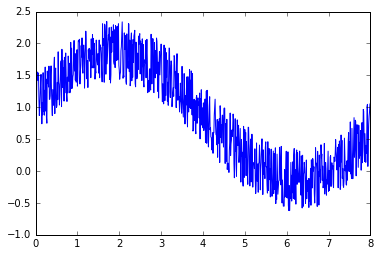

In [3]:
# Plot the graph of signal vs seconds.
# Does it look linear?
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(wheel['seconds'],wheel['signal'])

In the following cell, we define the function that we think might be
the relationship between signal and seconds, but it has many parameters (a, b and c). 

The argument _t_ is where we will pass in "seconds"; the function returns a value that is hopefully equivalent to signal.

In [ ]:
import math
def underlying_function(t, a,b,c):
    return math.sin(a * t + b) + c

We need a function that says how close a match a particular set of
parameters are: let's use the mean squared error to make sense of it.

In [ ]:
import sklearn.metrics

def try_a_b_c(a,b,c):
    this_try = [underlying_function(w, a, b, c) for w in wheel.seconds]
    return sklearn.metrics.mean_squared_error(this_try, wheel.signal)

We don't need an exact derivative: a close approximation will do.

try_a_b_c is a function in three dimensions (a, b and c) so the gradient
is a 3-dimensional vector (which we store in a numpy array).

In [ ]:
import numpy
def gradient_of_try_a_b_c(a, b, c, delta=0.0001):
    here = try_a_b_c(a,b,c)
    a_gradient = (try_a_b_c(a+delta, b, c) - here) / delta
    b_gradient = (try_a_b_c(a, b+delta, c) - here) / delta
    c_gradient = (try_a_b_c(a, b, c+delta) - here) / delta
    return numpy.array([a_gradient,b_gradient,c_gradient])

The following code implements gradient descent.

In [ ]:
def gradient_descent(gradient_func, a0, b0, c0, l=0.01):
    vector = numpy.array([a0, b0, c0])
    g = gradient_func(a0, b0, c0)
    return vector - l * g

def gradient_descent_iterate(starting_point, 
                             gradient=gradient_of_try_a_b_c, 
                             n=10,
                             l=0.01):
    points = [starting_point]
    for i in range(n):
        (a,b,c) = points[-1]
        new_point = gradient_descent(gradient, a,b,c, l)
        points.append(new_point)
    return points

Pick a starting point: it doesn't matter much which point you choose.

In [ ]:
starting_point = numpy.array([   ,     ,   ])

What's the value of try_a_b_c at this starting point?

Iterate one step with gradient_descent_iterate. What does it suggest
is a better point (with a lower error)?

What's the value of try_a_b_c at this point?

What about if you iterate 100 times? Or 1000 times? Try some different
learning rates.

Try to guess the values of a, b and c . Evaluate try_a_b_c at this point

Use underlying_function with the a,b and c you found, and use it to 
make predictions for signal from seconds. Plot the results. How well does it compare?

array([  6.91319379e+02,  -1.27408152e+01,  -3.87672890e+00,
         4.56607614e+00,   1.65013884e-01,   8.92586592e+00,
         6.59463401e+00,   4.98923106e+00,   4.96125181e+00,
         7.06931762e+00,   8.08349553e+00,  -6.24836185e+00,
        -7.10746382e+00,   8.37315463e+00,   6.71927380e+00,
        -4.70625662e+00,  -4.14636038e+00,  -3.00052307e-01,
         4.10714242e+00,   1.06033251e+01,   7.93491500e+00,
        -5.43134128e+00,   1.57103830e+01,  -2.41014134e-01,
         3.26714611e+00,   8.93784911e+00,  -4.12313144e-01,
         1.81353342e+00,   4.48150937e+00,   5.23713750e+00,
         3.80145037e+00,   4.63168345e-01,  -1.71022241e+00,
        -1.65265110e+00,   3.45139363e+00,   7.41440399e-01,
        -7.76200437e-01,   1.40330074e+00,  -4.53458606e+00,
         7.79887236e-01,  -4.89855838e+00,   1.05926525e+01,
        -8.59395820e+00,   7.80712093e+00,  -8.94355097e+00,
         6.49176838e+00,   6.20017621e+00,  -8.45021791e-01,
         1.52326173e+01,

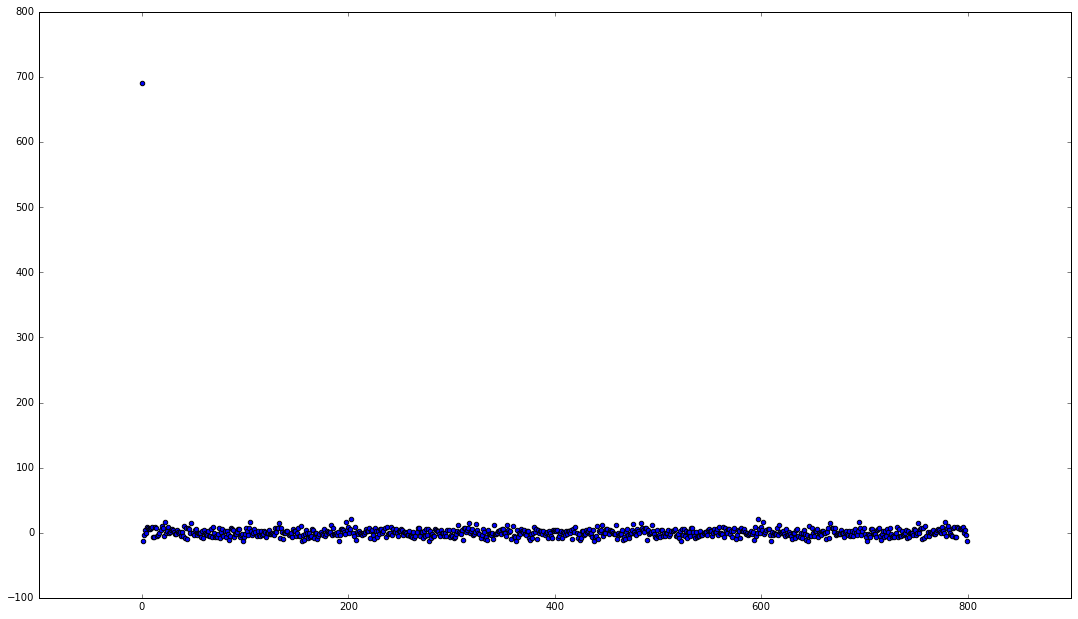

In [21]:
import numpy as np
t = np.arange(256)
sp = np.fft.fft(wheel['signal'])
#freq = np.fft.fftfreq(t.shape[-1])
fig = plt.figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(range(len(sp.real)),sp.real)
#plt.plot(sp.imag)

sp.real
